https://github.com/agaidus/census_data_extraction/blob/master/Reading_Zipped_Shapefiles.ipynb

In [17]:
import urllib
from zipfile import ZipFile
from io import BytesIO
import shapefile
import geopandas as gpd
from shapely.geometry import shape  
import osr
import pandas as pd
import requests
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
url = 'http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_county_500k.zip'
data = ZipFile(BytesIO(urllib.request.urlopen(url).read()))


# zipfile = ZipFile(StringIO(urllib.request.urlopen(county_file_url).read()))

In [47]:
filenames = [y for y in sorted(data.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)
dbf, prj, shp, shx = [BytesIO(data.read(filename)) for filename in filenames]

['cb_2017_us_county_500k.dbf', 'cb_2017_us_county_500k.prj', 'cb_2017_us_county_500k.shp', 'cb_2017_us_county_500k.shx']


In [48]:
r = shapefile.Reader(shp=shp, shx=shx, dbf=dbf)
print(r.numRecords)

3233


In [49]:
attributes, geometry = [], []
field_names = [field[0] for field in r.fields[1:]]  
for row in r.shapeRecords():  
    geometry.append(shape(row.shape.__geo_interface__))  
    attributes.append(dict(zip(field_names, row.record)))  

In [50]:
proj4 = osr.SpatialReference(prj.read().decode("ascii")).ExportToProj4()



In [52]:
gdf = gpd.GeoDataFrame(data = attributes, geometry = geometry, crs = proj4).to_crs(epsg = 3424)

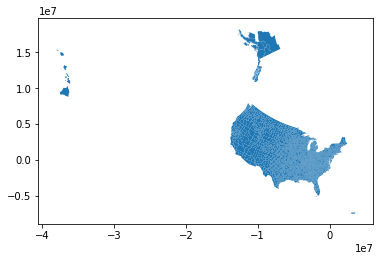

In [53]:
gdf.plot()

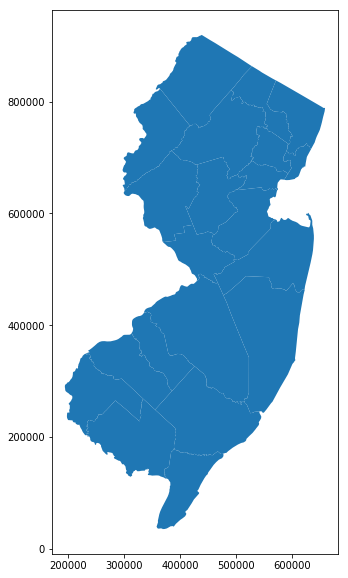

In [54]:
nj = gdf[gdf.STATEFP=='34'].to_crs(epsg = 3424)
nj.plot(figsize=(10, 10))